In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
data= pd.read_csv('a1cf7b45-25ee-42a1-81e0-ceddf61de9be.csv')
data

,Sample1,Delta1
0,6.72,8.05
1,5.12,7.12
2,4.85,25.06
3,4.45,18.79
4,12.19,92.69
...,...,...
495,5.92,NaN
496,8.45,NaN
497,12.79,NaN
498,7.39,NaN


In [12]:
#Functions

def frequency_group_table(df,start,end,interval):
    group=pd.cut(df.to_numpy(),bins=list(range(start,end+1,interval)),right=False).value_counts().to_frame()
    group.reset_index(level=0, inplace=True)
    group=group.rename(columns={"index": "group", 0: "frequency"})
    return group

def cum_freq_table(df):
    #Cum frequency from frequency
    df['cum_freq'] = df['frequency'].cumsum()
    #Add left and right boundary
    df['left_boundary']=df['group'].apply(lambda x: x.left)
    df['right_boundary']=df['group'].apply(lambda x: x.right)
    #Discarding the group with zero frequency to make calculation more easier
    df=df[df['frequency']!=0]
    return df

def ith_value_finder(percentile,N):
    return (percentile*N)/100

def percentile_calculator(cum_freq,ithvalue,interval): 
    
    '''
        Pj class = (jn/100)th value of the observation
        Pj=L+((jn/100)-cff/f)⋅i
        where, 
                n= no. of observation
                Pj= locate the jth percentile group.
                L= lower class boundary of the class containing the jth percentile
                cff = cumulative frequency of the class immediately preceding to the class containing Pj
                f= frequency of that group
                i= interval

    '''
    if len([d for d in cum_freq if d['cum_freq'] <= ithvalue])==0:
        cff=0
    else:
        cff=[d for d in cum_freq if d['cum_freq'] <= ithvalue][-1]['cum_freq']
    result=[d for d in cum_freq if d['cum_freq'] >= ithvalue][0]
    L=result['left_boundary']
    f=result['frequency']
    i=interval
    return round(L+((ithvalue-cff)/f)*i,2)

def percentile_main(cum_freq,interval,percentile):
    ithvalue=ith_value_finder(percentile,cum_freq['frequency'].sum())
    approx=percentile_calculator(cum_freq.to_dict('records'),ithvalue,interval)
    return approx

def error_per(actual,approx):
    '''
        Percentage Error:|Approximate Value − Actual Value|/Actual Value  × 100%

    '''
    return round(abs(approx-actual)/actual*100,2)
    

In [13]:
#Config
percentile=99
interval=5
df_tobe_calculated=data['Sample1']
df_tobe_added=data['Delta1']

#For actual
combined_array=np.append(df_tobe_calculated.to_numpy(),df_tobe_added.to_numpy(), axis=0)
combined_array = combined_array[~np.isnan(combined_array)]

oldfreq=frequency_group_table(df_tobe_calculated,0,100,interval)
newfreq=frequency_group_table(df_tobe_added,0,100,interval)
oldfreq['frequency']=oldfreq['frequency']+newfreq['frequency']
freq=oldfreq

#We need combined frequency to start our calculation
cum_freq=cum_freq_table(freq)
actual=round(np.quantile(combined_array,percentile/100),2)
percentile_main(cum_freq,interval,percentile)

94.42

In [5]:
cum_freq=cum_freq_table(freq)
approx_percentile_array=[]
actual_percentile_array=[]
error_per_array=[]
difference_array=[]
percentile_array=[]
for i in range(0,101):
    actual=round(np.quantile(combined_array,i/100),2)
    approx=percentile_main(cum_freq,interval,i)
    percentile_array.append(i)
    approx_percentile_array.append(approx)
    actual_percentile_array.append(actual)
    error_per_array.append(error_per(actual,approx))
    difference_array.append(abs(actual-approx))

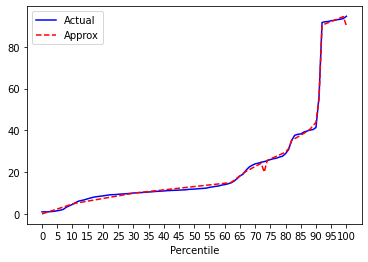

In [6]:
x = percentile_array
fig, ax = plt.subplots()
ax.plot(x,actual_percentile_array , '-b', label='Actual')
ax.plot(x, approx_percentile_array, '--r', label='Approx')
plt.xticks(np.arange(0, len(x)+1, 5))
plt.xlabel('Percentile')
# ax.axis('equal')
leg = ax.legend();
# plt.savefig('a.png')

Text(0.5, 0, 'Percentile')

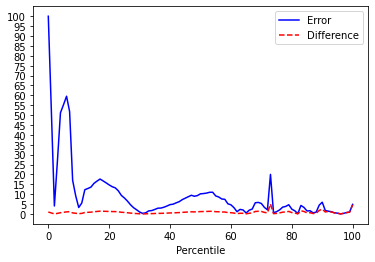

In [7]:
x = percentile_array
fig, ax = plt.subplots()
ax.plot(x,error_per_array , '-b', label='Error')
ax.plot(x, difference_array, '--r', label='Difference')
plt.yticks(np.arange(0, len(x)+1, 5))
# ax.axis('equal')
leg = ax.legend();
plt.xlabel('Percentile')
# plt.savefig('b.png')